# Question 1

## 1.1

### A

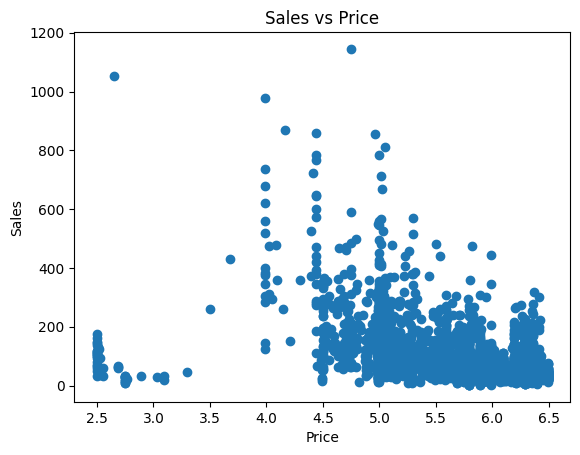

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Q1_data.csv")

# Plotting Sales vs Price
plt.scatter(data['Price'], data['Sales'])
plt.xlabel('Price')
plt.ylabel('Sales')
plt.title('Sales vs Price')
plt.show()

### B

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.optimize import minimize_scalar

# Specify the dependent and independent variables
X = data["Price"]
y = data["Sales"]

# Add a constant to the independent variables (Price)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Extracting coefficients
intercept_coef = results.params['const']
price_coef = results.params['Price']

print(price_coef)

-69.54932118188339


### C

In [23]:
# Define the cost per pizza
cost_per_pizza = 2

# Define the profit function using the sales formula from the regression results
def compute_profit(price):
    sales = intercept_coef + price_coef * price
    profit = sales * (price - cost_per_pizza)
    return -profit

# Find the price that maximizes profit
optimal_price = 0
max_profit = float('-inf')
for price in range(1, 1000):  # range of prices to search
    profit = compute_profit(price)
    if profit > max_profit:
        max_profit = profit
        optimal_price = price

result = minimize_scalar(compute_profit)
optimal_price = result.x
max_profit = compute_profit(-optimal_price)

# Print the optimal price and maximum profit
print("Optimal pizza price:", round(optimal_price, 2))
print("Maximum profit:", max_profit)
# print(results.summary())

Optimal pizza price: 4.46
Maximum profit: 5107.8064480268695


### D

In [24]:
# Calculate profit for each store
def calculate_profit(sales, price):
    return (price - cost_per_pizza) * sales

# Apply profit function to each store
data['Profit'] = calculate_profit(data['Sales'], optimal_price)

# Calculate total profit across all stores
total_profit = data['Profit'].sum()

# Print the total expected profit
print("Total expected profit:", round(total_profit, 2))

Total expected profit: 893854.77


## 1.2

### A

In [25]:
import pandas as pd
import statsmodels.api as sm

# Load the data
data = pd.read_csv("Q1_data.csv")

# Specify the dependent and independent variables
X = data[["Price", "Margherita"]]
y = data["Sales"]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     736.2
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          3.22e-276
Time:                        10:15:12   Log-Likelihood:                -25175.
No. Observations:                4368   AIC:                         5.036e+04
Df Residuals:                    4365   BIC:                         5.038e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        401.5382     12.492     32.143      0.0

### B

In [26]:
# Equation for the sales of pizza depending on the price and pizza type
sales_eq = f"Sales = {results.params['const']:.2f} + {results.params['Price']:.2f} * Price + {results.params['Margherita']:.2f} * Margherita"

# Print the equation
print("Equation for the sales of pizza depending on the price and pizza type:")
print(sales_eq)

Equation for the sales of pizza depending on the price and pizza type:
Sales = 401.54 + -57.21 * Price + 50.41 * Margherita


### C

In [27]:
# Coefficients from the OLS regression
const_coef = 401.54
price_coef = -57.21
margherita_coef = 50.41

# Define the prices
price_1 = 1
price_2 = 2

# Compute sales for Margherita pizza
sales_margherita_price_1 = const_coef + price_coef * price_1 + margherita_coef * 1
sales_margherita_price_2 = const_coef + price_coef * price_2 + margherita_coef * 1

# Compute sales for Pepperoni pizza
sales_pepperoni_price_1 = const_coef + price_coef * price_1 + margherita_coef * 0
sales_pepperoni_price_2 = const_coef + price_coef * price_2 + margherita_coef * 0

# Print the sales
print("Sales for Margherita pizza when price is $1:", sales_margherita_price_1)
print("Sales for Margherita pizza when price is $2:", sales_margherita_price_2)
print("Difference in sales for Margherita:", sales_margherita_price_1 - sales_margherita_price_2)
print("\nSales for Pepperoni pizza when price is $1:", sales_pepperoni_price_1)
print("Sales for Pepperoni pizza when price is $2:", sales_pepperoni_price_2)
print("Difference in sales for Pepperoni:", sales_pepperoni_price_1 - sales_pepperoni_price_2)


Sales for Margherita pizza when price is $1: 394.74
Sales for Margherita pizza when price is $2: 337.53
Difference in sales for Margherita: 57.210000000000036

Sales for Pepperoni pizza when price is $1: 344.33000000000004
Sales for Pepperoni pizza when price is $2: 287.12
Difference in sales for Pepperoni: 57.210000000000036


### D

In [28]:
from scipy.optimize import minimize_scalar

# Coefficients from the OLS regression
const_coef = 401.54
price_coef = -57.21
margherita_coef = 50.41

# Define the profit function for Margherita pizza
def calculate_profit_margherita(price):
    sales = const_coef + price_coef * price + margherita_coef * 1  # Sales for Margherita pizza
    profit = (price - 2) * sales  # Profit calculation
    return -profit  # Negative sign as we want to maximize profit

# Find optimal price for Margherita pizza
result_margherita = minimize_scalar(calculate_profit_margherita)
optimal_price_margherita = result_margherita.x

# Define the profit function for Pepperoni pizza
def calculate_profit_pepperoni(price):
    sales = const_coef + price_coef * price + margherita_coef * 0  # Sales for Pepperoni pizza
    profit = (price - 2) * sales  # Profit calculation
    return -profit  # Negative sign as we want to maximize profit

# Find optimal price for Pepperoni pizza
result_pepperoni = minimize_scalar(calculate_profit_pepperoni)
optimal_price_pepperoni = result_pepperoni.x

# Print the optimal prices
print("Optimal price for Margherita pizza: $" + str(round(optimal_price_margherita, 2)))
print("Optimal price for Pepperoni pizza: $" + str(round(optimal_price_pepperoni, 2)))


Optimal price for Margherita pizza: $4.95
Optimal price for Pepperoni pizza: $4.51


### F

In [29]:
# Define function to calculate profit for each store
def calculate_profit(sales, price):
    cost_per_pizza = 2  # Cost per pizza
    return (price - cost_per_pizza) * sales

# Split the dataset into Margherita and Pepperoni subsets
margherita_subset = data[data['Margherita'] == 1]
pepperoni_subset = data[data['Margherita'] == 0]

# Create copies of subsets to avoid chained indexing
margherita_subset = margherita_subset.copy()
pepperoni_subset = pepperoni_subset.copy()

# Calculate profit for Margherita pizza subset
margherita_subset.loc[:, 'Profit'] = calculate_profit(margherita_subset['Sales'], optimal_price_margherita)

# Calculate profit for Pepperoni pizza subset
pepperoni_subset.loc[:, 'Profit'] = calculate_profit(pepperoni_subset['Sales'], optimal_price_pepperoni)


# Calculate total profit across all stores
total_profit = margherita_subset['Profit'].sum() + pepperoni_subset['Profit'].sum()

# Print the total expected profit
print("Total expected profit: $" + str(round(total_profit, 2)))

Total expected profit: $964352.26


## 1.3

### A

In [30]:
import pandas as pd
import statsmodels.api as sm

# Load the data
data = pd.read_csv("Q1_data.csv")

# Specify the dependent and independent variables
X = data[["Price", "Margherita", "Price Competitor"]]
y = data["Sales"]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     530.7
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          4.76e-294
Time:                        10:15:12   Log-Likelihood:                -25130.
No. Observations:                4368   AIC:                         5.027e+04
Df Residuals:                    4364   BIC:                         5.029e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              354.5466     13.323  

### C

In [36]:
# Define the optimal prices
optimal_price_margherita = 4.95
optimal_price_pepperoni = 4.51

# Define a function to calculate profit for each store
def calculate_profit(sales, price):
    cost_per_pizza = 2  # Assuming cost per pizza is $2
    return (price - cost_per_pizza) * sales

# Define a function to calculate total profit
def calculate_total_profit(data, optimal_price_margherita, optimal_price_pepperoni, competitor_price=None):
    total_profit = 0
    for index, row in data.iterrows():
        price = row['Price']
        sales = row['Sales']
        if row['Margherita'] == 1:
            price = optimal_price_margherita if competitor_price is None else competitor_price
        else:
            price = optimal_price_pepperoni if competitor_price is None else competitor_price
        profit = calculate_profit(sales, price)
        total_profit += profit
    return total_profit

# Calculate the total expected profit under the current circumstances
total_expected_profit_current = calculate_total_profit(data, optimal_price_margherita, optimal_price_pepperoni)

# Decrease competitor's price by $0.5
competitor_price_decreased = 4.07 - 0.5

# Calculate the new total expected profit
total_expected_profit_new = calculate_total_profit(data, optimal_price_margherita, optimal_price_pepperoni, competitor_price=competitor_price_decreased)

# Calculate the change in total expected profit
profit_change = total_expected_profit_new - total_expected_profit_current

print("Change in total expected profit: $" + str(round(profit_change, 2)))



Change in total expected profit: $-393499.72
